In [1]:
from google.colab import files
uploaded = files.upload()

Saving Advertising Budget and Sales.csv to Advertising Budget and Sales.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading dataset

data = pd.read_csv('Advertising Budget and Sales.csv')

In [4]:
data


,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


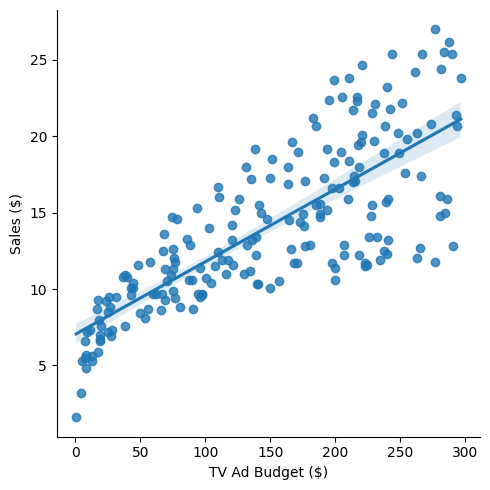

In [6]:
# Scatterplot of TV vs. Sales
sns.lmplot(x="TV Ad Budget ($)", y="Sales ($)", data=data)
plt.show()

The scatter plot shows a positive linear relationship between TV ad budget and sales, but the presence of outliers suggests that other factors may also influence sales.

In [7]:
#importing  stat model
import statsmodels.api as sm


In [8]:
data.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [11]:
# defining dependent and independent variables

X = data[['TV Ad Budget ($)']]  # Predictor
y = data['Sales ($)'] # Target

In [12]:
# Adding constant for intercept
X = sm.add_constant(X)

# Fitting OLS regression model
model = sm.OLS(y, X).fit()


In [13]:
# Printing model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Sales ($)   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           1.47e-42
Time:                        18:38:31   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0326      0.458  

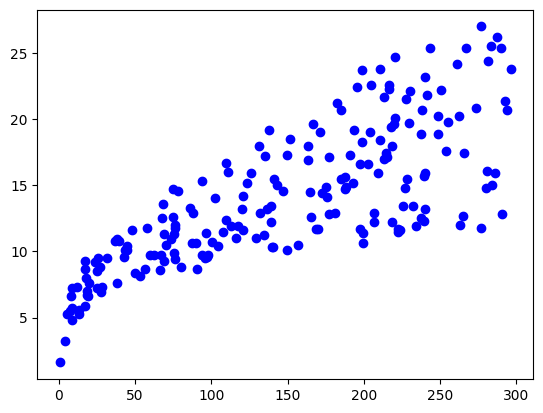

In [14]:
# Scatter plot between TV sales and Sales
plt.scatter(data['TV Ad Budget ($)'], data['Sales ($)'], color='blue', label="Data points")

In [17]:
y_pred = model.params[0] + model.params[1] * data['TV Ad Budget ($)']

<ipython-input-17-b142e0d94130>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred = model.params[0] + model.params[1] * data['TV Ad Budget ($)']


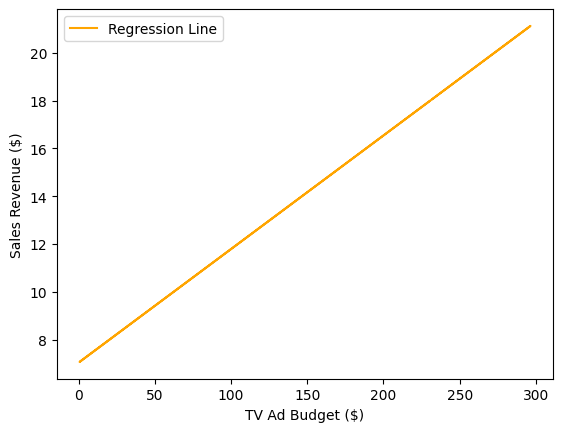

In [20]:
# Regression line
plt.plot(data['TV Ad Budget ($)'], y_pred, color='orange', label="Regression Line")
plt.xlabel("TV Ad Budget ($)")
plt.ylabel("Sales Revenue ($)")
plt.legend()
plt.show()

our OLS regression model is trained and ready to predict sales based on TV Ad Budget.

In [23]:
# Example: Predict sales for a $200 TV Ad Budget

new_data = pd.DataFrame({'const': [1], 'TV Ad Budget ($)': [200]})
new_data = sm.add_constant(new_data)  # Adding intercept

predicted_sales = model.predict(new_data)
print("Predicted Sales ($):", predicted_sales[0])


Predicted Sales ($): 16.539921635731652


The predicted sales of dollar 16.54 on spending dollar 200 on TV ads is expected to generate approximately $16.54 in revenue, based on the model.